In [2]:
import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#import seaborn as sns
#%matplotlib inline
import numpy as np
#import datetime 

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('BD_LAB_EXAMPLE_SAMPLE.csv', encoding='windows-1251')

In [257]:
#df[df['network_service_direction'] == 'Incoming'].head(30)
df.head()

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5
0,1994159,232217,service_fee,service_fee_430,NaN,08AUG17:02:45:27,.,.,39.9989,0,...,.,.,0,phone,1,NaN,NaN,NaN,NaN,NaN
1,1780148,35230,service_fee,service_fee_570,NaN,27JUL17:05:40:04,.,.,1.0625,0,...,.,.,0,smartphone,2,NaN,NaN,NaN,NaN,NaN
2,1788625,232217,account_ref,refill_1,NaN,10AUG17:11:12:33,.,.,50.0000,0,...,.,.,0,smartphone,2,Досуг,Новости и СМИ,Hi-Tech,Справка,Бизнес и экономика
3,1656133,237875,account_ref,refill_2,NaN,04JUL17:15:36:42,.,.,100.0000,0,...,.,.,0,smartphone,2,NaN,NaN,NaN,NaN,NaN
4,1783561,232217,unblocking,blocking_1,NaN,19JUN17:16:03:20,.,.,.,0,...,.,.,0,smartphone,2,Справка,Hi-Tech,Дом и семья,Новости и СМИ,Наука и образование


In [258]:
df.columns

Index(['hash_number_A', 'hash_tariff', 'event', 'event_sub',
       'network_service_direction', 'event_start_date', 'LAT', 'LON', 'cost',
       'hash_number_B', 'number_B_category', 'call_duration_minutes',
       'data_volume_mb', 'hash_accum_code', 'device_type',
       'phone_price_category', 'interest_1', 'interest_2', 'interest_3',
       'interest_4', 'interest_5'],
      dtype='object')

In [4]:
#Exclude entries with '.'
df = df[df.LAT != '.']
df.head()

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5
14321,2006027,57042,network_ser,content,Incoming,19AUG17:18:30:02,51.212778541,24.707222985,0.0000,95157,...,0,0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN
14322,1873067,35152,network_ser,other_sms,Incoming,27JUN17:09:28:51,50.362776252,25.699165777,0.0000,95167,...,0,0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN
14323,1873067,35152,network_ser,other_sms,Incoming,27JUN17:09:28:39,50.362776252,25.699165777,0.0000,95167,...,0,0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN
14324,1877518,45807,network_ser,international_voice,Incoming,14JUL17:13:27:16,51.340276506,26.622500127,0.0000,95167,...,0.5,0,0,smartphone,2,Досуг,Наука и образование,Дом и семья,Hi-Tech,Новости и СМИ
14325,1680547,35152,network_ser,international_voice,Incoming,31AUG17:18:59:19,48.897779558,24.851111493,0.0000,95184,...,18.25,0,0,phone,1,NaN,NaN,NaN,NaN,NaN


In [19]:
df.network_service_direction.unique()

array([nan, 'Outgoing', 'Incoming'], dtype=object)

# Developing Edges and Nodes

In [35]:
dfg = dfg.drop(['number_B_category'], axis = 1)

In [31]:
dfg = df[(df.network_service_direction == 'Outgoing') | (df.network_service_direction == 'Incoming')]

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,time
14320,1783561,232217,network_ser,roaming_sms,Outgoing,21JUN17:10:22:52,.,.,0.0000,95094,...,0,0,smartphone,2,Справка,Hi-Tech,Дом и семья,Новости и СМИ,Наука и образование,2017-06-21 10:22:52
14321,2006027,57042,network_ser,content,Incoming,19AUG17:18:30:02,51.212778541,24.707222985,0.0000,95157,...,0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-19 18:30:02
14322,1873067,35152,network_ser,other_sms,Incoming,27JUN17:09:28:51,50.362776252,25.699165777,0.0000,95167,...,0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-06-27 09:28:51
14323,1873067,35152,network_ser,other_sms,Incoming,27JUN17:09:28:39,50.362776252,25.699165777,0.0000,95167,...,0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-06-27 09:28:39
14324,1877518,45807,network_ser,international_voice,Incoming,14JUL17:13:27:16,51.340276506,26.622500127,0.0000,95167,...,0,0,smartphone,2,Досуг,Наука и образование,Дом и семья,Hi-Tech,Новости и СМИ,2017-07-14 13:27:16
14325,1680547,35152,network_ser,international_voice,Incoming,31AUG17:18:59:19,48.897779558,24.851111493,0.0000,95184,...,0,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-08-31 18:59:19
14326,2516168,232510,network_ser,other_sms,Incoming,08AUG17:15:52:59,48.941945462,24.745278032,0.0000,95284,...,0,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-08-08 15:52:59
14327,2682395,232510,network_ser,international_voice,Outgoing,17JUN17:07:40:25,48.931112383,24.698332443,7.0000,95752,...,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-06-17 07:40:25
14328,2682395,232510,network_ser,international_voice,Outgoing,03JUL17:21:16:53,48.940834351,24.69274911,7.0000,95752,...,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-07-03 21:16:53
14329,2682395,232510,network_ser,international_voice,Outgoing,21JUN17:15:38:31,48.940834351,24.69274911,7.0000,95752,...,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-06-21 15:38:31


In [63]:
dfg = dfg.drop(['event_sub', 'network_service_direction', 'cost', 'call_duration_minutes', 'data_volume_mb'], axis = 1)

In [185]:
dfg.head()

,hash_number_A,hash_number_B
14320,1783561,95094
14321,2006027,95157
14322,1873067,95167
14323,1873067,95167
14324,1877518,95167


In [99]:
graph = dfg['hash_number_A'].groupby(dfg['hash_number_B']).value_counts()
graph.to_csv('Graph.csv')

In [ ]:
dfg['Source'] 
dfg['Target']

In [205]:
dict = {k3['Id'].tolist() : k3['Label'].tolist()} 

TypeError: unhashable type: 'list'

In [237]:
#df[df['network_service_direction'] == 'Incoming'].head(30)
unique_numbers = pd.DataFrame(pd.unique(df['hash_number_A']))
unique_numbers.columns = ['hash_number']
unique_numbers_B = pd.DataFrame(pd.unique(df['hash_number_B']))
unique_numbers_B.columns = ['hash_number']
joined_df = pd.DataFrame(pd.unique(pd.concat([unique_numbers, unique_numbers_B])['hash_number']))
joined_df.columns = ['hash_number_A']
idx = [i for i in range(len(joined_df))]
#print(idx)
joined_df['idx'] = idx
joined_df
df = pd.merge(df, joined_df, on = 'hash_number_A', how = 'left')
df.rename(columns = {'idx' : 'idxA'}, inplace = True)
joined_df.rename(columns = {'hash_number_A' : 'hash_number_B'}, inplace = True)
#joined_df
df['hash_number_B'] = df['hash_number_B'].fillna(0).astype(int)
#df['hash_number_B'].head()
df = pd.merge(df, joined_df, on = 'hash_number_B', how = 'left')
df.rename(columns = {'idx' : 'idxB'}, inplace = True)
df

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,idxA,idxB
0,1994159,232217,service_fee,service_fee_430,NaN,08AUG17:02:45:27,.,.,39.9989,0,...,0,phone,1,NaN,NaN,NaN,NaN,NaN,0,983
1,1780148,35230,service_fee,service_fee_570,NaN,27JUL17:05:40:04,.,.,1.0625,0,...,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,1,983
2,1788625,232217,account_ref,refill_1,NaN,10AUG17:11:12:33,.,.,50.0000,0,...,0,smartphone,2,Досуг,Новости и СМИ,Hi-Tech,Справка,Бизнес и экономика,2,983
3,1656133,237875,account_ref,refill_2,NaN,04JUL17:15:36:42,.,.,100.0000,0,...,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,3,983
4,1783561,232217,unblocking,blocking_1,NaN,19JUN17:16:03:20,.,.,.,0,...,0,smartphone,2,Справка,Hi-Tech,Дом и семья,Новости и СМИ,Наука и образование,4,983
5,1785129,35152,account_ref,refill_1,NaN,20JUL17:17:40:19,.,.,80.0000,0,...,0,phone,1,Справка,Hi-Tech,NaN,NaN,NaN,5,983
6,1875543,232510,service_add,service_331,NaN,29AUG17:15:04:19,.,.,0.0000,0,...,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,6,983
7,1797480,232217,account_ref,refill_1,NaN,15JUN17:10:43:41,.,.,48.0000,0,...,0,NaN,1,NaN,NaN,NaN,NaN,NaN,7,983
8,1875592,178349,account_ref,refill_1,NaN,15JUL17:18:58:49,.,.,18.0000,0,...,0,phone,1,NaN,NaN,NaN,NaN,NaN,8,983
9,1795627,232510,account_ref,refill_1,NaN,07JUN17:16:42:36,.,.,20.0000,0,...,0,NaN,1,NaN,NaN,NaN,NaN,NaN,9,983


In [244]:
len(df[df['hash_number_A'] == 1994159]), len(graph1[graph1['idxA'] == 0])

(736, 43)

In [245]:
graph1 = pd.DataFrame(df['idxA'].groupby(['idxB']).size()).reset_index()
graph1

KeyError: 'idxB'

In [229]:
#graph1['Weight'] = graph1['count']/graph1['count'].max()
#graph1['Type'] = 'Undirected'
#del graph1['count']
graph1.columns = ['Source', 'Target', 'Weight', 'Type']
graph1 = set_column_sequence(graph1, ['Source', 'Target', 'Type', 'Weight'])
graph1

,Source,Target,Type,Weight
0,0,983,Undirected,0.000647
1,0,2809,Undirected,0.001165
2,0,3013,Undirected,0.001941
3,0,3252,Undirected,0.001423
4,0,3308,Undirected,0.004011
5,0,3989,Undirected,0.001165
6,0,9320,Undirected,0.000129
7,0,10099,Undirected,0.000388
8,0,10153,Undirected,0.000259
9,0,11589,Undirected,0.019281


In [234]:
graph1.to_csv('edges.csv')
nodes.to_csv('nodes.csv')

In [232]:
joined_df.columns = ['Label', 'Id']
nodes = set_column_sequence(joined_df, ['Id', 'Label'])
nodes

,Id,Label
0,0,1994159
1,1,1780148
2,2,1788625
3,3,1656133
4,4,1783561
5,5,1785129
6,6,1875543
7,7,1797480
8,8,1875592
9,9,1795627


,hash_number_A,hash_tariff,event_start_date,hash_number_B,number_B_category,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,time,idxA,idxB
0,1994159,232217,08AUG17:02:45:27,0,NaN,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-08-08 02:45:27,0,983
1,1780148,35230,27JUL17:05:40:04,0,NaN,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-07-27 05:40:04,1,983
2,1788625,232217,10AUG17:11:12:33,0,NaN,0,smartphone,2,Досуг,Новости и СМИ,Hi-Tech,Справка,Бизнес и экономика,2017-08-10 11:12:33,2,983
3,1656133,237875,04JUL17:15:36:42,0,NaN,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-07-04 15:36:42,3,983
4,1783561,232217,19JUN17:16:03:20,0,NaN,0,smartphone,2,Справка,Hi-Tech,Дом и семья,Новости и СМИ,Наука и образование,2017-06-19 16:03:20,4,983
5,1785129,35152,20JUL17:17:40:19,0,NaN,0,phone,1,Справка,Hi-Tech,NaN,NaN,NaN,2017-07-20 17:40:19,5,983
6,1875543,232510,29AUG17:15:04:19,0,NaN,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-29 15:04:19,6,983
7,1797480,232217,15JUN17:10:43:41,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,2017-06-15 10:43:41,7,983
8,1875592,178349,15JUL17:18:58:49,0,NaN,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-07-15 18:58:49,8,983
9,1795627,232510,07JUN17:16:42:36,0,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,2017-06-07 16:42:36,9,983


In [136]:
graph3.to_csv('Graph3.csv')

In [161]:
k3 = pd.DataFrame(k3)
k3.to_csv('node.csv')

In [214]:
k3.head()

,Id,Label
0,0,1783561
1,1,2006027
2,2,1873067
3,3,1877518
4,4,1680547


In [ ]:
graph1 = pd.read_csv('Graph.csv', header = ['A', 'B', 'Weight'])
graph1.head()

In [155]:
k1 = graph3.hash_number_A.unique().tolist()
k2 = graph3.hash_number_B.unique().tolist()
k3 = k1 + k2

In [125]:
graph1['Weight'] = graph1['count']/graph1['count'].max()

,hash_number_B,hash_number_A,count,Weight
0,95094,1783561,1,0.000129
1,95157,2006027,1,0.000129
2,95167,1873067,2,0.000259
3,95167,1877518,1,0.000129
4,95184,1680547,1,0.000129


In [134]:
def set_column_sequence(dataframe, seq, front=True):
    '''Takes a dataframe and a subsequence of its columns,
       returns dataframe with seq as first columns if "front" is True,
       and seq as last columns if "front" is False.
    '''
    cols = seq[:] # copy so we don't mutate seq
    for x in dataframe.columns:
        if x not in cols:
            if front: #we want "seq" to be in the front
                #so append current column to the end of the list
                cols.append(x)
            else:
                #we want "seq" to be last, so insert this
                #column in the front of the new column list
                #"cols" we are building:
                cols.insert(0, x)
    return dataframe[cols]

In [156]:
#graph2 = graph1.drop('count', axis = 1)
graph2['dir'] = 'Undirected'
graph3 = set_column_sequence(graph2, ['hash_number_B', 'hash_number_A', 'dir', 'Weight'])

In [183]:
k3 = set_column_sequence(k3, ['node', 0])
k3.columns = ['Id', 'Label']
k3.head()

,Id,Label
0,0,1783561
1,1,2006027
2,2,1873067
3,3,1877518
4,4,1680547


In [ ]:
df_coord = pd.DataFrame(columns = ['Name', 'LAT', 'LON'])
listoflist = []
#coordinates of border points
from geopy.geocoders import Nominatim
geolocator = Nominatim()
for i in gelist:
    location = geolocator.geocode([i])
    df_coord = df_coord.append({'Name': i, 'LAT': location.latitude, 'LON': location.longitude}, ignore_index=True)
    coord_list = [location.latitude, location.longitude]
    listoflist.append(coord_list)
    print(i,location.latitude, location.longitude)
df_coord.head()
listoflist
#print(location.address)
#print(location.raw)

In [189]:
#DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
#graph4 = graph3.join(k3, on =k3['Id'])
#graph4.head()

In [186]:
graph3

,hash_number_B,hash_number_A,dir,Weight
0,95094,1783561,Undirected,0.000129
1,95157,2006027,Undirected,0.000129
2,95167,1873067,Undirected,0.000259
3,95167,1877518,Undirected,0.000129
4,95184,1680547,Undirected,0.000129
5,95284,2516168,Undirected,0.000129
6,95752,2682395,Undirected,0.000647
7,95764,2716723,Undirected,0.000129
8,95931,1999724,Undirected,0.000129
9,95933,1878405,Undirected,0.001423


In [200]:
graph33 = graph3.join(k3, by = k3['Label'])
graph33

TypeError: join() got an unexpected keyword argument 'by'

In [197]:
#k33 = k3['Label']
for i in graph3['hash_number_B']:
    for j in k3['Label']:
        if i == j:
            i = k3['Id'][j]
graph3

KeyError: 95094

In [157]:
graph1 = pd.DataFrame({'count' : dfg.groupby(['hash_number_B', 'hash_number_A']).size()}).reset_index()

In [54]:
dfg.event_sub.unique()

array(['roaming_sms', 'content', 'other_sms', 'international_voice',
       'roaming_voice', 'international_sms', 'pstn', 'onnet_voice',
       'onnet_sms', 'omo_voice', 'omo_sms', 'data', 'roaming'], dtype=object)

# 

In [ ]:
dfg[dfg.event_sub == 'pstn']

In [187]:
#dfg = dfg.drop(['hash_tariff', 'event', 'event_start_date', 'LAT', 'LON', 'hash_accum_code', 'device_type', 'phone_price_category', 'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5', 'time'], axis = 1)

In [26]:
dfg

,hash_number_A,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,number_B_category,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,time
14320,1783561,roaming_sms,Outgoing,21JUN17:10:22:52,.,.,0.0000,95094,NaN,0,0,0,smartphone,2,Справка,Hi-Tech,Дом и семья,Новости и СМИ,Наука и образование,2017-06-21 10:22:52
14327,2682395,international_voice,Outgoing,17JUN17:07:40:25,48.931112383,24.698332443,7.0000,95752,NaN,1,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-06-17 07:40:25
14328,2682395,international_voice,Outgoing,03JUL17:21:16:53,48.940834351,24.69274911,7.0000,95752,NaN,1,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-07-03 21:16:53
14329,2682395,international_voice,Outgoing,21JUN17:15:38:31,48.940834351,24.69274911,7.0000,95752,NaN,1,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-06-21 15:38:31
14330,2682395,international_voice,Outgoing,21JUN17:15:40:02,48.940834351,24.69274911,2.0000,95752,NaN,1,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-06-21 15:40:02
14331,2682395,international_voice,Outgoing,18JUN17:19:53:59,48.940834351,24.69274911,7.0000,95752,NaN,1,0,265,phone,1,NaN,NaN,NaN,NaN,NaN,2017-06-18 19:53:59
14333,1999724,international_voice,Outgoing,24JUN17:21:23:06,48.432945716,26.210278541,0.0000,95931,NaN,1,0,267,smartphone,2,Досуг,Наука и образование,Hi-Tech,Новости и СМИ,Дом и семья,2017-06-24 21:23:06
14337,1878405,international_voice,Outgoing,30AUG17:13:58:44,48.268333079,25.925999364,0.0000,95933,NaN,1,0,421,smartphone,2,Hi-Tech,Справка,NaN,NaN,NaN,2017-08-30 13:58:44
14338,1878405,international_voice,Outgoing,30AUG17:14:56:29,48.27394419,25.931693809,0.0000,95933,NaN,1,0,421,smartphone,2,Hi-Tech,Справка,NaN,NaN,NaN,2017-08-30 14:56:29
14339,1878405,international_voice,Outgoing,30AUG17:14:58:54,48.268333079,25.925999364,0.0000,95933,NaN,1,0,421,smartphone,2,Hi-Tech,Справка,NaN,NaN,NaN,2017-08-30 14:58:54


In [13]:
len(df[df.LAT != '.'])
df[df.LAT == '.']


,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,time
0,1994159,232217,service_fee,service_fee_430,NaN,08AUG17:02:45:27,.,.,39.9989,0,...,.,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-08-08 02:45:27
1,1780148,35230,service_fee,service_fee_570,NaN,27JUL17:05:40:04,.,.,1.0625,0,...,.,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-07-27 05:40:04
2,1788625,232217,account_ref,refill_1,NaN,10AUG17:11:12:33,.,.,50.0000,0,...,.,0,smartphone,2,Досуг,Новости и СМИ,Hi-Tech,Справка,Бизнес и экономика,2017-08-10 11:12:33
3,1656133,237875,account_ref,refill_2,NaN,04JUL17:15:36:42,.,.,100.0000,0,...,.,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-07-04 15:36:42
4,1783561,232217,unblocking,blocking_1,NaN,19JUN17:16:03:20,.,.,.,0,...,.,0,smartphone,2,Справка,Hi-Tech,Дом и семья,Новости и СМИ,Наука и образование,2017-06-19 16:03:20
5,1785129,35152,account_ref,refill_1,NaN,20JUL17:17:40:19,.,.,80.0000,0,...,.,0,phone,1,Справка,Hi-Tech,NaN,NaN,NaN,2017-07-20 17:40:19
6,1875543,232510,service_add,service_331,NaN,29AUG17:15:04:19,.,.,0.0000,0,...,.,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-29 15:04:19
7,1797480,232217,account_ref,refill_1,NaN,15JUN17:10:43:41,.,.,48.0000,0,...,.,0,NaN,1,NaN,NaN,NaN,NaN,NaN,2017-06-15 10:43:41
8,1875592,178349,account_ref,refill_1,NaN,15JUL17:18:58:49,.,.,18.0000,0,...,.,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-07-15 18:58:49
9,1795627,232510,account_ref,refill_1,NaN,07JUN17:16:42:36,.,.,20.0000,0,...,.,0,NaN,1,NaN,NaN,NaN,NaN,NaN,2017-06-07 16:42:36


In [5]:
df['LAT'] = df['LAT'].astype('float32')
df['LON'] = df['LON'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309551 entries, 14321 to 1327628
Data columns (total 21 columns):
hash_number_A                1309551 non-null int64
hash_tariff                  1309551 non-null int64
event                        1309551 non-null object
event_sub                    1309551 non-null object
network_service_direction    1309551 non-null object
event_start_date             1309551 non-null object
LAT                          1309551 non-null float32
LON                          1309551 non-null float32
cost                         1309551 non-null object
hash_number_B                1309551 non-null int64
number_B_category            23520 non-null object
call_duration_minutes        1309551 non-null object
data_volume_mb               1309551 non-null object
hash_accum_code              1309551 non-null int64
device_type                  1233990 non-null object
phone_price_category         1309551 non-null object
interest_1                   738670 non

In [ ]:
#Selecting Lviv data
df1 = df[(df['LAT']> 49.7) & (df['LAT']< 49.9) & (df['LON']> 23.9) & (df['LON']< 24.2)]
df1

In [10]:
# Time 
time = []
for tim in df['event_start_date']:
    tim1 = datetime.datetime.strptime(tim, "%d%b%y:%H:%M:%S")
    time.append(tim1)
df['time'] = time

In [11]:
for i in df1.columns:
    print(i, len(df1[i].unique()))

NameError: name 'df1' is not defined

In [ ]:
df.columns

In [9]:
flo = ['cost', 'call_duration_minutes', 'data_volume_mb']
for ff in flo:
    df1[ff] = df1[ff].astype('float32')

In [ ]:
#Aggregate numeric data by mean value
for ff in flo:
    df1[ff].groupby(df1['hash_number_A']).mean()

In [10]:
cat = ['hash_number_A', 'hash_tariff', 'event', 'event_sub', 'network_service_direction', 'hash_number_B', 'number_B_category', 
 'hash_accum_code', 'device_type', 'phone_price_category', 'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5']
for cc in cat:
    df1[cc] = df1[cc].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45641 entries, 14420 to 1327627
Data columns (total 21 columns):
hash_number_A                45641 non-null category
hash_tariff                  45641 non-null category
event                        45641 non-null category
event_sub                    45641 non-null category
network_service_direction    45641 non-null category
event_start_date             45641 non-null object
LAT                          45641 non-null float32
LON                          45641 non-null float32
cost                         45641 non-null float32
hash_number_B                45641 non-null category
number_B_category            2688 non-null category
call_duration_minutes        45641 non-null float32
data_volume_mb               45641 non-null float32
hash_accum_code              45641 non-null category
device_type                  39215 non-null category
phone_price_category         45641 non-null category
interest_1                   31548 non-null c

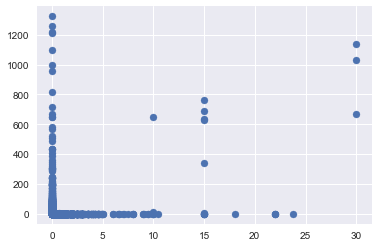

In [70]:
plt.scatter(df1.cost, df1.data_volume_mb)

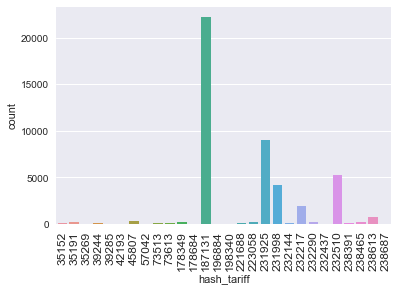

In [35]:
ec = sns.countplot(x="hash_tariff", data=df1)
ec.set_xticklabels(ec.get_xticklabels(), rotation=90, fontsize=12)

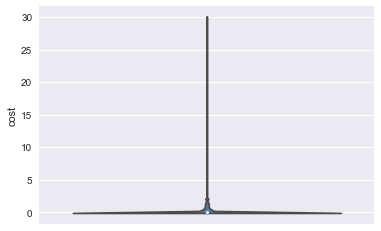

In [45]:
sns.violinplot(y='cost', data= df1)

In [56]:
#% of 0 cost of the call
df1[df1.cost == 0]['cost'].value_counts()/len(df1)

0.0    0.953397
Name: cost, dtype: float64

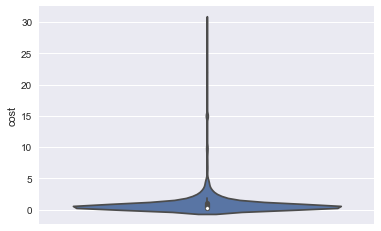

In [57]:
sns.violinplot(y='cost', data= df1[df1.cost != 0])  

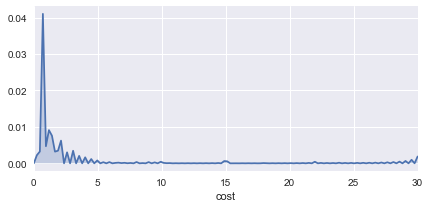

In [11]:
facet = sns.FacetGrid(df1, hue = '' aspect=2)
facet.map(sns.kdeplot,'cost',shade= True)
facet.set(xlim=(0, df1['cost'].max()))

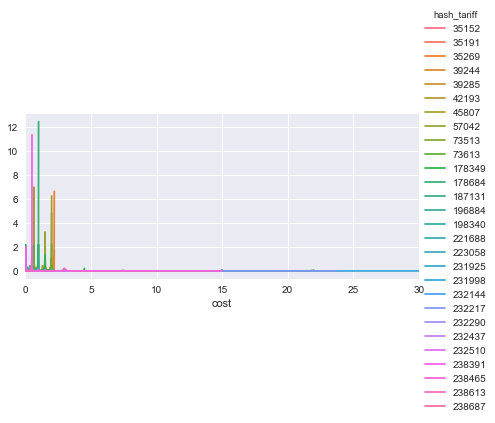

In [69]:
facet = sns.FacetGrid(df1, hue = 'hash_tariff', aspect=2)
facet.map(sns.kdeplot,'cost',shade= True)
facet.set(xlim=(0, df1['cost'].max()))
facet.add_legend()

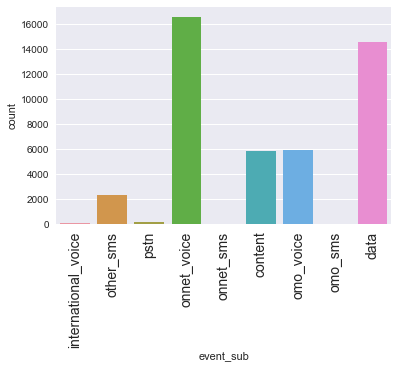

In [32]:
ec = sns.countplot(x="event_sub", data=df1)
ec.set_xticklabels(ec.get_xticklabels(), rotation=90, fontsize=14)

In [70]:
#Address by location name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Lviv 79000")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Львів, Львівська міська рада, Львівська область, Україна
(49.841952, 24.0315921)
{'place_id': '179672633', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'relation', 'osm_id': '2032280', 'boundingbox': ['49.7678305', '49.9037122', '23.9051028', '24.1334136'], 'lat': '49.841952', 'lon': '24.0315921', 'display_name': 'Львів, Львівська міська рада, Львівська область, Україна', 'class': 'place', 'type': 'city', 'importance': 0.17249691489459, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}


In [10]:
#When coordinates are entered into this code, it produced address, postcode, etc.

from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse('48.612247, 22.298445')
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

11, Ф. Тихого вулиця, Радванка, Ужгород, Закарпатська область, 88000-88499, Україна
(48.6129457, 22.298556128218)
{'place_id': '170942190', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'way', 'osm_id': '476147087', 'lat': '48.6129457', 'lon': '22.298556128218', 'display_name': '11, Ф. Тихого вулиця, Радванка, Ужгород, Закарпатська область, 88000-88499, Україна', 'address': {'house_number': '11', 'road': 'Ф. Тихого вулиця', 'suburb': 'Радванка', 'city': 'Ужгород', 'state': 'Закарпатська область', 'postcode': '88000-88499', 'country': 'Україна', 'country_code': 'ua'}, 'boundingbox': ['48.6127924', '48.6130991', '22.2983075', '22.2988048']}


In [9]:
latitudes = df['LAT'].tolist()
longitudes = df['LON'].tolist()

In [11]:
import gmplot

gmap = gmplot.GoogleMapPlotter(location.latitude, location.longitude, 5)

#gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
#gmap.scatter( latitudes, longitudes, 'r', 1000, marker=False)
#gmap.scatter(latitudes, longitudes, 'k', marker=True)
gmap.heatmap(latitudes, longitudes)

gmap.draw(htmlfile= 'mymap.html')

In [32]:
df['time'][0].hour

2

In [33]:
df.event.unique()

array(['service_fee', 'account_ref', 'unblocking', 'service_add',
       'service_del', 'blocking', 'network_ser'], dtype=object)

In [247]:
import gmplot

gmap = gmplot.GoogleMapPlotter(49.841952, 24.0315921, 16)

In [251]:
#gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
#gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)

#gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")

NameError: name 'longtitudes' is not defined

In [ ]:
Львів - аеропорт
Ужгород - аеропорт
Чернівці - аеропорт
Івано-Франківськ аеропорт
Тернопіль - аеропорт
